# Adaptive trajectory for the compensation of pre-mirror deformation
awojdyla@lbl.gov, April 2020

In this script, we calculate the paramters and the trajectory for a 
– adapted from `20200430 Adaptive trajectory for the compensation of pre-mirror deformation.ipynb`

We are using the example of the ALS-U FLEXON beamline (outboard, XPCS-XL.)

For similar script in Matlab, refer to the file `vls_refocus.m`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Gratings parameters

In [3]:
E0_eV = 543
lambda0_m = 1239e-9/E0_eV
g0_lpm = 175.16e3
c0 = 2.255
p_m= 21.497
q_m= 8.398

## Base trajectory and modified trajectory
Here we calculate the base trajectory of the VIA-VLS grating, to extract the b2 parameter analytically, since it will be useful in a later derivation. 

Those parameters are not exact (very close though.) The formula for exact paramaters is at the end.

In [4]:
# calculate base settings

# entrance angle (G1)
alpha0p_rad = np.sqrt(2*g0_lpm*lambda0_m/(c0**2-1))
# exit angle
beta0p_rad = c0*alpha0p_rad
# half includede angle (M2 angle)
theta0_rad = (alpha0p_rad+beta0p_rad)/2

#calculate VLS coefficient
# approximate
b2 = (alpha0p_rad**2/p_m + beta0p_rad**2/q_m)/(2*g0_lpm*lambda0_m)

## resolving power
L_und = 2
resolving_power = p_m*np.sqrt(g0_lpm*(c0**2-1)/L_und)*np.pi/(2*2.35)

print("resolving power (approximate): %1.0f" %resolving_power)

resolving power (approximate): 8595


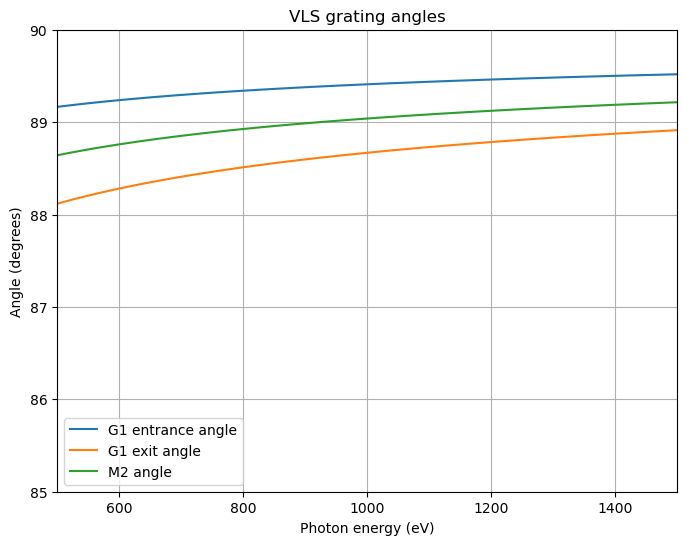

In [7]:
# entrance angle (G1)
Es_eV = np.linspace(500, 1500, 100)
lambdas_m = 1239e-9/Es_eV
# entrance angle (G1)   
alphaps_rad = np.sqrt(2*g0_lpm*lambdas_m/(c0**2-1))
# exit angle
betaps_rad = c0*alphaps_rad
# half includede angle (M2 angle)
thetas_rad = (alphaps_rad+betaps_rad)/2

plt.figure(figsize=(8, 6))
plt.plot(Es_eV, 90- np.degrees(alphaps_rad), label='G1 entrance angle')
plt.plot(Es_eV, 90- np.degrees(betaps_rad), label='G1 exit angle')
plt.plot(Es_eV, 90 - np.degrees(thetas_rad), label='M2 angle')
plt.ylim((85, 90))
plt.xlim((500, 1500))
plt.xlabel('Photon energy (eV)')
plt.ylabel('Angle (degrees)')
plt.title('VLS grating angles')
plt.legend()
plt.grid()
plt.show()

## Corrected trajectory to compensate pre-mirror deformation

Now we calculate how the added curvature to the mirror change the position of the apparent source, and proceed to a trajectory adaptation to correct it

In [26]:
# new apparent source position

## negative means convex mirror, as is often the case for heatload deformations
R_m = -5000 # may depend on theta0_rad 
qr_m = 1/(2/(R_m*np.sin(theta0_rad))-1/p_m)

## new "virtual" source for the monochromator
pr_m = -qr_m

# calculate new mono position

## pick you energy (should work for any energy)
lambdar_m = lambda0_m

## new c-value
cr = np.sqrt((b2+1/pr_m)/(b2-1/q_m))

## calculate new angles for the target energy
alpharp_rad = np.sqrt(2*g0_lpm*lambdar_m/(cr**2-1))
betarp_rad = cr*alpharp_rad
thetarp_rad = (alpharp_rad+betarp_rad)/2

## convert to incidence angles in degrees, for input into 
alphar_deg = 90-alpharp_rad*180/np.pi
betar_deg  = -(90-betarp_rad*180/np.pi)
thetar_deg = 90-thetarp_rad*180/np.pi
#fprintf('\nalpha [deg] = %1.4f\nbeta [deg] = %1.4f\ntheta [deg] = %1.4f',alphar_deg, betar_deg, thetar_deg)

In [27]:
def corrected_trajectory(R_m, E_eV=543, g0_lpm = 175.16e3, c0 = 2.255, E0_eV = 543, p_m= 21.497, q_m= 8.398) :
    """
    returns (alphar_deg, betar_deg, thetar_deg)
    """
    
    lambda0_m = 1239e-9/E0_eV
    # entrance angle (G1)
    alpha0p_rad = np.sqrt(2*g0_lpm*lambda0_m/(c0**2-1))
    # exit angle
    beta0p_rad = c0*alpha0p_rad
    # half includede angle (M2 angle)
    theta0_rad = (alpha0p_rad+beta0p_rad)/2

    #calculate VLS coefficient
    b2 = (alpha0p_rad**2/p_m + beta0p_rad**2/q_m)/(2*g0_lpm*lambda0_m)

    # R_m may depend on theta0_rad
    qr_m = 1/(2/(R_m*np.sin(theta0_rad))-1/p_m)
    pr_m = -qr_m

    # target wavelength
    lambdar_m = 1239e-9/E_eV

    cr = np.sqrt((b2+1/pr_m)/(b2-1/q_m))

    alpharp_rad = np.sqrt(2*g0_lpm*lambdar_m/(cr**2-1))
    betarp_rad = cr*alpharp_rad
    thetarp_rad = (alpharp_rad+betarp_rad)/2

    alphar_deg = 90-alpharp_rad*180/np.pi
    betar_deg  = -(90-betarp_rad*180/np.pi)
    thetar_deg = 90-thetarp_rad*180/np.pi
    
    return (alphar_deg, betar_deg, thetar_deg)

In [34]:
(alphar_deg, betar_deg, thetar_deg) = corrected_trajectory(1000)
alphar_deg

88.83022762745992

In [ ]:
# verification – should yield the same number
(alphar_deg, betar_deg, thetar_deg) = corrected_trajectory(1000000)
90-alpha0p_rad*180/np.pi

89.1985185457234

## Exact VLS parameters

Text(0, 0.5, 'groove density (l/mm)')

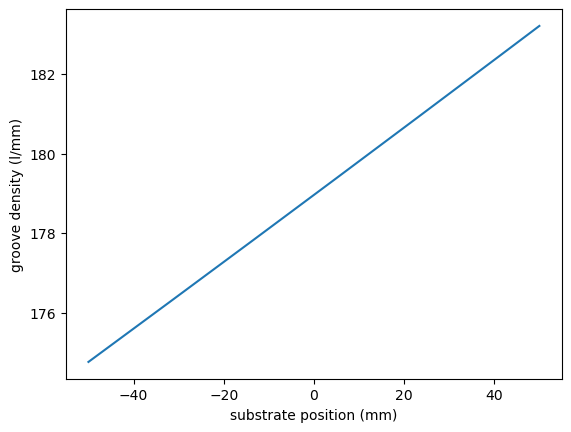

In [ ]:
# tested ok
Eopt_eV = 379.1
lambda0_m = 1239e-9/Eopt_eV
g0_lpmm = 178.96
c_ff = 1.632
p_m= 24.301
q_m= 7.573

alpha0_deg =np.arcsin((-(2*1*0.000001239842/Eopt_eV*g0_lpmm*1000)+np.sqrt((2*1*0.000001239842/Eopt_eV*g0_lpmm*1000)**2-4*(c_ff**2-1)*(1-1**2*(0.000001239842/Eopt_eV)**2*(g0_lpmm*1000)**2-c_ff**2)))/(2*(c_ff**2-1)))*180/np.pi
beta0_deg = np.arcsin(-np.sqrt(1-c_ff**2*(1-(np.sin(alpha0_deg*np.pi/180))**2)))*180/np.pi

b2 = (np.cos(alpha0_deg*np.pi/180)**2/p_m + np.cos(beta0_deg*np.pi/180)**2/q_m)/(2*g0_lpmm*1000*1239*0.000000001/Eopt_eV)
b3 = (np.cos(alpha0_deg*np.pi/180)**2*np.sin(alpha0_deg*np.pi/180)/p_m**2-np.cos(beta0_deg*np.pi/180)**2*np.sin(beta0_deg*np.pi/180)/q_m**2)*1/(2*g0_lpmm*1000*1239*0.000000001/Eopt_eV)
b4 = (np.cos(alpha0_deg*np.pi/180)**2*(4*np.sin(alpha0_deg*np.pi/180)**2-np.cos(alpha0_deg*np.pi/180)**2)/p_m**3-np.cos(beta0_deg*np.pi/180)**2*(4*np.sin(beta0_deg*np.pi/180)**2-np.cos(beta0_deg*np.pi/180)**2)/q_m**3)*1/(8*g0_lpmm*1000*1239*0.000000001/Eopt_eV)

g1_lpmm = g0_lpmm*2*b2/1000
g2_lpmm = g0_lpmm*2*b3/1e6
g3_lpmm = g0_lpmm*3*b4/1e9

# untested - use with caution
x_mm = np.linspace(-50, 50, 1000)
g_lpmm = g0_lpmm + g1_lpmm*x_mm + g2_lpmm*x_mm**2 + g3_lpmm*x_mm**3
plt.plot(x_mm, g_lpmm)
plt.xlabel('substrate position (mm)')
plt.ylabel('groove density (l/mm)')

In [ ]:
## line position
line_number = np.cumsum(g_lpmm*(x_mm[1]-x_mm[0]))
plt.plot(x_mm, line_number)
plt.xlabel('substrate position (mm)')
plt.ylabel('line number')
plt.grid()
plt.title('Line number vs substrate position')